In [2]:
from pandas import read_excel
import numpy
dataset = read_excel('titanic-passengers Excel.xlsx')
# mark zero values as missing or NaN
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
dataset.drop(['Cabin'], axis=1, inplace=True)

In [5]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [6]:
dataset['Age'].fillna(dataset['Age'].median(),inplace=True)

In [7]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
dataset['Embarked'].fillna('S',inplace=True)

In [9]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
import seaborn as sns
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

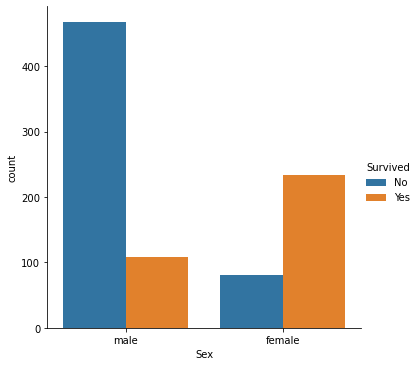

In [23]:
# Countplot 
sns.catplot(x ="Sex", hue ="Survived",  
kind ="count", data = dataset)

# More females survive than males

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

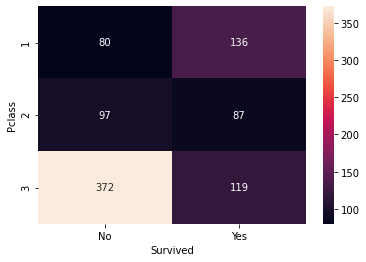

In [24]:
group = dataset.groupby(['Pclass', 'Survived']) 
pclass_survived = group.size().unstack()  
sns.heatmap(pclass_survived, annot = True, fmt ="d")

# Passengers with Pclass 1 tickets are more likely to survive and Pclass 3 ticket holders are less likely to survive

<AxesSubplot:xlabel='Sex', ylabel='Age'>

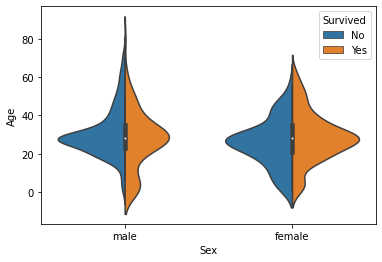

In [27]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = dataset, split = True)

# The survival rate is –

Good for children.
High for Men & women in the age range 20-50.
Less for men as the age increases.

In [36]:
dataset['Fare_Range'] = pd.qcut(dataset['Fare'], 4)

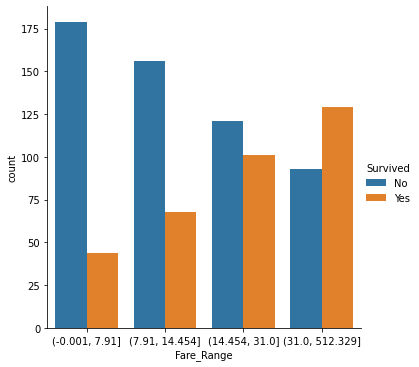

In [42]:
sns.catplot(x ="Fare_Range", hue ="Survived",  
kind ="count", data = dataset)

#  Those who paid more for the trip are more likely to survive.

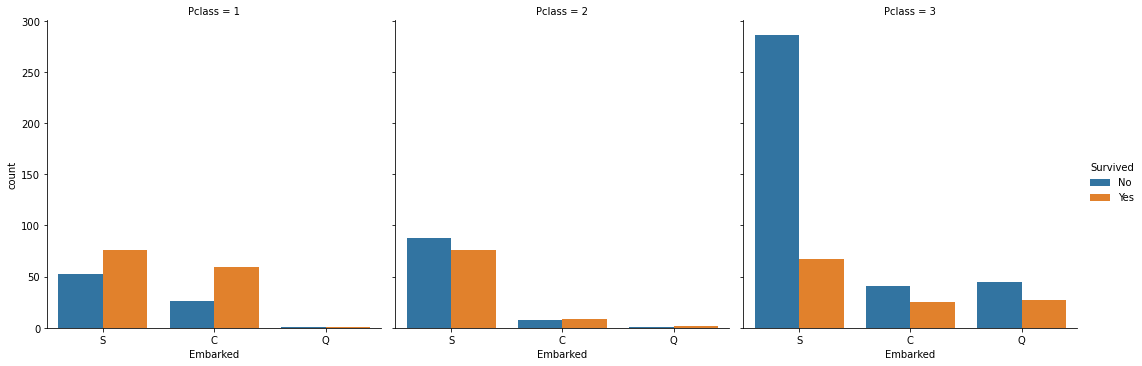

In [43]:
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = dataset)

# "S" looks lucky for class 1 and 2 passengers compared to class 3.